# 第4章 文件读取与文件合并
本章将从以下几部分来介绍文件的读取及合并：

1. 常用读取、输出文本/excel数据
2. 使用python内置函数读取数据
    - 基本文件操作open()/close()
    - json数据
    - yaml配置文件
    - XML和HTML：Web信息收集
3. 序列化存储格式
    - pickle序列化
    - HDF5格式存储
    - shelve保存变量
4. web APIs交互
5. 数据库交互
6. 多文件合并

### 1. 常用读取、输出文本/excel数据

pandas提供了一些用于将表格型数据读取为DataFrame对象的函数。
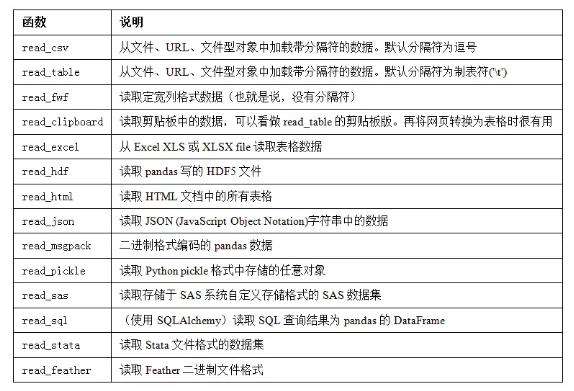
这些函数的选项可以划分为以下几个大类：
- 索引：将一个或多个列当做返回的DataFrame处理，以及是否从文件、用户获取列名。
- 类型推断和数据转换：包括用户定义值的转换、和自定义的缺失值标记列表等。
- 日期解析：包括组合功能，比如将分散在多个列中的日期时间信息组合成结果中的单个列。
- 迭代：支持对大文件进行逐块迭代。
- 不规整数据问题：跳过一些行、页脚、注释或其他一些不重要的东西（比如由成千上万个逗号隔开的数值数据）。

#### 1.1 读取基本操作

In [1]:
import pandas as pd
data1 = pd.read_csv('D:\\test_file\\t1.csv')
# 等价于 pd.read_table('D:\\test_file\\t1.csv',sep=',')
data1.head(3)

,Unnamed: 0,name,salary
0,1,Tom,5000
1,2,Jack,10000
2,3,Mick,3000


In [19]:
#如果路径中含有中文，需要指定engine，有时候也需要指定编码格式,encoding = 'utf-8'
import pandas as pd
data1 = pd.read_csv('D:\\test_file\\测试\\t1.csv',engine='python',encoding='utf-8')
data1.head(5)

,Unnamed: 0,name,salary
0,1,Tom,5000
1,2,Jack,10000
2,3,Mick,3000
3,4,Mack,9800
4,5,May,4000


In [20]:
#也可以使用table，但是要指定分隔符，
customer = pd.read_table("D:\\test_file\\t1.csv",sep = ',')
customer.head(3)

,Unnamed: 0,name,salary
0,1,Tom,5000
1,2,Jack,10000
2,3,Mick,3000


In [22]:
#没有列名的话可以使用系统指定
customer = pd.read_csv("D:\\test_file\\t1(noheader).csv",header = None)
customer.head(3)

,0,1,2
0,1,Tom,5000
1,2,Jack,10000
2,3,Mick,3000


In [23]:
#没有列名的话也可以自定义
customer = pd.read_csv("D:\\test_file\\t1(noheader).csv",names=['a','b','c'])
customer.head(3)

,a,b,c
0,1,Tom,5000
1,2,Jack,10000
2,3,Mick,3000


In [24]:
# 可以指定某列作为索引
customer = pd.read_csv("D:\\test_file\\t1(noheader).csv",header=None,index_col=0)
customer.head(3)

,1,2
0,,
1,Tom,5000
2,Jack,10000
3,Mick,3000


In [25]:
# 也可建立层次索引
customer = pd.read_csv("D:\\test_file\\t1(noheader).csv",header=None,index_col=[0,1])
customer.head(3)

,,2
0,1,
1,Tom,5000
2,Jack,10000
3,Mick,3000


In [27]:
#使用skiprows可以跳过文件指定的行
customer = pd.read_csv("D:\\test_file\\t1.csv",skiprows=[1,3])
customer.head(10)

,Unnamed: 0,name,salary
0,2,Jack,10000
1,4,Mack,9800
2,5,May,4000
3,6,Tim,5000
4,7,Aym,6000
5,8,Lu,7000
6,9,Li,8000


#### 1.2 逐块读取文本文件

In [5]:
# 如果只想读取几行（避免读取整个文件），通过nrows进行指定即可
pd.read_csv("D:\\test_file\\t1.csv",nrows=3)  # 只读取前3行

,Unnamed: 0,name,salary
0,1,Tom,5000
1,2,Jack,10000
2,3,Mick,3000


In [7]:
# 要逐块读取文件，可以指定chunksize,通过指定一个chunksize分块大小来读取文件
pd.read_csv('D:\\test_file\\t1.csv',chunksize=1000) # 每一块大小为1000

read_csv所返回的这个TextParser对象使你可以根据chunksize对文件进行逐块迭代。如下所示：

In [11]:
chunker = pd.read_csv('D:\\test_file\\t1.csv',chunksize=1000)

tot = pd.Series([])
for piece in chunker:
    tot = tot.add(piece['salary'].value_counts(),fill_value=0)
tot = tot.sort_values(ascending=False)
tot

5000     2.0
10000    1.0
9800     1.0
7000     1.0
4000     1.0
8000     1.0
6000     1.0
3000     1.0
dtype: float64

#### 1.3 将数据写出到文本格式
利用DataFrame的to_csv方法，我们可以将数据写到一个以逗号分隔的文件中

In [2]:
import pandas as pd
customer = pd.read_csv("D:\\test_file\\t1.csv")
customer.to_csv("D:\\test_file\\test_to_t1.csv")

当然，还可以使用其他分割符

In [3]:
customer.to_csv("D:\\test_file\\test_to_t2.csv",sep='|')

缺失值在输出结果中被表示为空字符串，可以表示为别的标记值

In [4]:
import numpy as np
customer = pd.read_csv("D:\\test_file\\t1.csv")
customer.ix[1:2,1:3]=np.nan
customer.to_csv("D:\\test_file\\t1_null.csv",sep='|',na_rep = 'NULL')#进一步指定分隔符

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


在默认情况下，会写出行和列的标签，不过也可以不保存行和列

In [7]:
customer.to_csv("D:\\test_file\\t1_null.csv",index=False,header=False)

此外，还可以只写出一部分的列，并以指定的顺序排列：

In [8]:
customer.to_csv("D:\\test_file\\t1_null_1.csv",index=False,columns=['name','salary'])

#### 1.4 读取excel
pandas.read_excel函数支持读取存储在Excel 2003（或更高版本）中的表格型数据。

In [34]:
t2 = pd.read_excel('D:/test_file/t2.xlsx')
t2

,year,gdp
0,2010,413030.3
1,2011,489300.6
2,2012,540367.4
3,2013,595244.4
4,2014,643974.0


In [37]:
# 可以指定读取相应的sheet表
t2 = pd.read_excel('D:/test_file/t2.xlsx','Sheet1')
t2

,year,gdp
0,2010,413030.3
1,2011,489300.6
2,2012,540367.4
3,2013,595244.4
4,2014,643974.0


In [38]:
# 可以利用to_excel方法将dataframe保存为excel
t2.to_excel('D:/test_file/t2_test.xlsx')

### 2. 使用python内置函数读取数据

#### 2.1 基本文件操作open()/close()
在 Python 中，读写文件有3 个步骤：  
1．调用open()函数，返回一个File 对象。  
2．调用File 对象的read()或write()方法。  
3．调用File 对象的close()方法，关闭该文件。

#### （1）打开文件
在读取或写入文件之前，必须使用Python的内置open()函数打开文件。此函数创建一个文件对象，该对象将用于调用与其相关联的其他支持方法。

open(file_name [, access_mode][, buffering])
- file_name:是一个字符串值，指定要访问的文件的名称。
- access_mode:确定文件打开的模式，即读取，写入，追加等。可能的值的完整列表如下表所示。 这是一个可选参数，默认文件访问模式为(r - 也就是只读)。
- buffering:如果buffering值设置为0，则不会发生缓冲。 如果缓冲值buffering为1，则在访问文件时执行行缓冲。如果将缓冲值buffering指定为大于1的整数，则使用指定的缓冲区大小执行缓冲操作。如果为负，则缓冲区大小为系统默认值(默认行为)。

#### （2）关闭文件
文件对象的close()方法刷新任何未写入的信息并关闭文件对象，之后不能再进行写入操作。当文件的引用对象重新分配给另一个文件时，Python也会自动关闭一个文件。但使用close()方法关闭文件是个好习惯。

In [52]:
# 打开一个文件
fo = open("D:\\test_file\\test1.txt", "wb")
print ("Name of the file: ", fo.name)
# 关闭文件
fo.close()

Name of the file:  D:\test_file\test1.txt


#### （3）读取文件
read()方法用于从打开的文件读取一个字符串。 重要的是要注意Python字符串除文本数据外可以是二进制数据。

In [3]:
# 打开并读取文件
filename = 'D:\\test_file\\test1.txt'
# 以只读方式打开文件，文件不可写
f = open(filename,'r')  # 使用open函数，返回一个file对象
text = f.read()
print(text)
f.close()

python
c++
java


In [4]:
# 打开并读取文件（逐行读取）
filename = 'D:\\test_file\\test1.txt'
# 以只读方式打开文件，文件不可写
f = open(filename,'r')  # 使用open函数，返回一个file对象
text = f.readlines()  # 从该文件取得一个字符串的列表。列表中的每个字符串就是文本中的每一行
print(text)
f.close()

['python\n', 'c++\n', 'java']


#### （4）写入文件
write()方法将任何字符串写入打开的文件。 重要的是要注意，Python字符串可以是二进制数据，而不仅仅是文本。write()方法不会在字符串的末尾添加换行符('\n')

In [5]:
#打开写入文件，删除原内容
#如果文件不存在，则新建文件
filename = 'D:\\test_file\\write_test1.txt'
f = open(filename,'w')#w为写入模式删除原有内容，如果只想添加，则需要选择a模式
f.write('hello world!')
f.close()
f = open(filename,'r')
print(f.read())
f.close()

hello world!


In [6]:
#打开写入文件，追加模式
#如果文件不存在，则新建文件
filename = 'D:\\test_file\\write_test1.txt'
f = open(filename,'a') #选择a模式
f.write('\nhello world!2')
f.close()
f = open(filename,'r')
print(f.read())
f.close()

hello world!
hello world!2


#### （5）with的使用
关键字with 在不再需要访问文件后将其关闭。在现实情况中，并非在任何情况下都能轻松确定关闭文件的恰当时机，但通过使用with结构，可
让Python去确定：你只管打开文件，并在需要时使用它，Python自会在合适的时候自动将其关闭。

In [8]:
filename = 'D:\\test_file\\test1.txt'
# 以只读方式打开文件，文件不可写
with open(filename,'r') as file_object:
    contents = file_object.read()
    print(contents)

python
c++
java


In [9]:
# 逐行读取
# readlines
# rstrip() 可以消除原有的换行符
filename = 'D:\\test_file\\test1.txt'
#以只读方式打开文件，文件不可写
with open(filename,'r') as file_object:
    lines = file_object.readlines()
    i = 1
    for line in lines:
        print(i,'\t',line.rstrip())
        i += 1

1 	 python
2 	 c++
3 	 java


In [10]:
#使用with打开写入文件，追加模式
#如果文件不存在，则新建文件
filename = 'D:\\test_file\\write_test1.txt'
with open(filename,'a') as f:
    f.write('\nhello world!3')
with open(filename,'r') as f:
    contents = f.read()
    print(contents)

hello world!
hello world!2
hello world!3


#### 2.2 json数据
JSON（JavaScript Object Notation的简称）已经成为通过HTTP请求在Web浏览器和其他应用程序之间发送数据的标准格式之一。它是一种比表格型文本格式（如CSV）灵活得多的数据格式。

- json.dumps() 将Python对象转换成JSON格式
- json.loads() 将JSON字符串转换成Python形式
- json.dump() 编码JSON数据
- json.load() 解码JSON数据

In [17]:
# 将一个Python数据结构转换为JSON
import json
data = {
    'name':'myname',
    'age':100
}
json_str = json.dumps(data)
json_str

'{"name": "myname", "age": 100}'

In [18]:
# 将一个JSON编码的字符串转换回一个Python数据结构
data = json.loads(json_str)
data

{'age': 100, 'name': 'myname'}

In [14]:
#存储数据
import json
number = [2,4,5,6,9,15]
filename = 'D:\\test_file\\js_test.json'
with open(filename,'w') as f:
    json.dump(number,f)

In [15]:
# 加载数据
filename = 'D:\\test_file\\js_test.json'
with open(filename,'r') as f:
    num = json.load(f)
    print(num)

[2, 4, 5, 6, 9, 15]


#### 2.3 yaml配置文件读写
YAML 是专门用来写配置文件的语言，非常简洁和强大，远比 JSON 格式方便。其读写与JSON读写非常相似，都是基于dump和load两个函数来实现。

##### （1）yaml文件读取

In [5]:
# 读取yml
import yaml
filename = 'D:/test_file/test_yaml.yaml'  # 文件路径
data = {
    'name':'myname',
    'age':100
}
with open(filename,'r') as file_object:
    d = yaml.load(file_object.read())
    print(d)

{'user': 'admin', 'psw': '123456'}


#### （2）yaml文件写入

In [7]:
import yaml
filename = 'D:/test_file/test_yaml.yaml'  # 写入文件
data = {
    'name':'Tom',
    'tel':'888888'
}
with open(filename,'w') as file_object:
    yaml.dump(data,file_object)

#### 2.4 XML和HTML：Web信息收集
Python有许多可以读写常见的HTML和XML格式数据的库，包括lxml、Beautiful Soup和html5lib。

pandas有一个内置的功能，read_html，它可以使用lxml和Beautiful Soup自动将HTML文件中的表格解析为DataFrame对象。

pandas.read_html有一些选项，默认条件下，它会搜索、尝试解析< table >标签内的的表格数据。结果是一个列表的DataFrame对象

In [21]:
url = 'http://s.askci.com/stock/a/?reportTime=2017-12-31&pageNum=1'
tb = pd.read_html(url)[3]  # 爬取网页的第4个表格
tb.head(3)

,序号,股票代码,股票简称,公司名称,省份,城市,主营业务收入(201712),净利润(201712),员工人数,上市日期,招股书,公司财报,行业分类,产品类型,主营业务
0,1,1,平安银行,平安银行股份有限公司,深圳市,罗湖区,--,--,32758,1991-04-03,--,NaN,银行,主营业务:经有关监管机构批准的各项商业银行业务,经有关监管机构批准的各项商业银行业务
1,2,2,万科A,万科企业股份有限公司,深圳市,盐田区,--,--,104300,1991-01-29,--,NaN,房地产开发,主营业务:房地产开发和物业服务,房地产开发和物业服务
2,3,4,国农科技,深圳中国农大科技股份有限公司,深圳市,南山区,--,--,210,1991-01-14,--,NaN,生物医药,主营业务:生物制药,生物制药


### 3. 序列化存储格式

#### 3.1 pickle序列化
实现数据的高效二进制格式存储最简单的办法之一是使用Python内置的pickle序列化。pandas对象都有一个用于将数据以pickle格式保存到磁盘上的to_pickle方法

In [22]:
customer = pd.read_csv("D:\\test_file\\t1.csv")
customer.to_pickle('D:\\test_file\\test_pickle')

通过pickle直接读取被pickle化的数据，或是使用更为方便的pandas.read_pickle

In [24]:
data = pd.read_pickle('D:\\test_file\\test_pickle')
data

,Unnamed: 0,name,salary
0,1,Tom,5000
1,2,Jack,10000
2,3,Mick,3000
3,4,Mack,9800
4,5,May,4000
5,6,Tim,5000
6,7,Aym,6000
7,8,Lu,7000
8,9,Li,8000


注意：pickle仅建议用于短期存储格式。其原因是很难保证该格式永远是稳定的；

pandas内置支持两个二进制数据格式：HDF5和MessagePack。pandas或NumPy数据的其它存储格式有：
- bcolz：一种可压缩的列存储二进制格式，基于Blosc压缩库。
- Feather：一种跨语言的列存储文件格式。Feather使用了Apache Arrow的列式内存格式。

#### 3.2 使用HDF5格式
HDF5是一种存储大规模科学数组数据的非常好的文件格式。它可以被作为C标准库，带有许多语言的接口，如Java、Python和MATLAB等。HDF5中的HDF指的是层次型数据格式（hierarchical data format）。每个HDF5文件都含有一个文件系统式的节点结构，它使你能够存储多个数据集并支持元数据。与其他简单格式相比，HDF5支持多种压缩器的即时压缩，还能更高效地存储重复模式数据。对于那些非常大的无法直接放入内存的数据集，HDF5就是不错的选择，因为它可以高效地分块读写。

虽然可以用PyTables或h5py库直接访问HDF5文件，pandas提供了更为高级的接口，可以简化存储Series和DataFrame对象。

In [31]:
frame = pd.DataFrame({'a':np.random.randn(100)})
store = pd.HDFStore('mydata.h5')
store['obj1'] = frame
store['obj1_col'] = frame['a']
store

<class 'pandas.io.pytables.HDFStore'>
File path: mydata.h5

In [33]:
# HDF5文件中的对象可以通过与字典一样的API进行获取
store['obj1'].head()

,a
0,0.096429
1,-0.208242
2,-0.740422
3,1.484414
4,1.036307


HDFStore支持两种存储模式，'fixed'和'table'。后者通常会更慢，但是支持使用特殊语法进行查询操作

In [34]:
store.put('obj2',frame,format='table') # 将对象存储在HDFStore中
# 查询索引在10到15之间的数据
print(store.select('obj2',where=['index >= 10 and index <=15']))
store.close()

           a
10 -1.256912
11 -0.909451
12  1.599612
13  0.250145
14 -0.002035
15  0.263363


pandas.read_hdf函数可以快捷实现上面的操作

In [35]:
frame.to_hdf('mydata.h5','obj3',format='table')
pd.read_hdf('mydata.h5','obj3',where=['index < 5'])

,a
0,0.096429
1,-0.208242
2,-0.740422
3,1.484414
4,1.036307


注意：HDF5不是数据库。它最适合用作“一次写多次读”的数据集。虽然数据可以在任何时候被添加到文件中，但如果同时发生多个写操作，文件就可能会被破坏。

#### 3.3 用Python中的shelve保存变量
利用shelve 模块，你可以将Python 程序中的变量保存到二进制的shelf 文件中。这样，程序就可以从硬盘中恢复变量的数据。shelve 模块让你在程序中添加“保存”和“打开”功能。例如，如果运行一个程序，并输入了一些配置设置，就可以将这些设置保存到一个shelf 文件，然后让程序下一次运行时加载它们。

In [15]:
#输出当前的绝对路径
import shelve
shelfFile = shelve.open('D:\\test_file\\mydata')#传入文件名
cats = ['Zophie','Pooka','Simon']
shelfFile['cats']=cats#将列表保存在shelfFile中，作为健‘cats’的关联值
shelfFile.close()
#在windows中运行上述代码，会在当前工作目录下有3个新文件：mydata.bak,mydata.dat,mydata.dir

In [16]:
#接下来重新打开这些文件取出数据
shelfFile = shelve.open('D:\\test_file\\mydata')
print(type(shelfFile))
print(shelfFile['cats'])
print(list(shelfFile.keys()))
print(list(shelfFile.values()))
shelfFile.close()

<class 'shelve.DbfilenameShelf'>
['Zophie', 'Pooka', 'Simon']
['cats']
[['Zophie', 'Pooka', 'Simon']]


### 4. Web APIs交互
许多网站都有一些通过JSON或其他格式提供数据的公共API。通过Python访问这些API的办法有不少。一个简单易用的办法（推荐）是requests包

本部分以搜索最新的30个GitHub上的pandas主题为例，下面使用requests扩展库，发一个HTTP GET请求。

In [39]:
# 发一个HTTP GET请求
import requests
url = 'https://api.github.com/repos/pandas-dev/pandas/issues'
resp = requests.get(url)
resp

<Response [200]>

响应对象的json方法会返回一个包含被解析过的JSON字典，加载到一个Python对象中

In [42]:
data = resp.json()
data[2]['title']

'Auto backport of pr 28074 on 0.25.x'

data中的每个元素都是一个包含所有GitHub主题页数据（不包含评论）的字典。我们可以直接传递数据到DataFrame，并提取感兴趣的字段

In [43]:
issues = pd.DataFrame(data,columns=['number','title','labels','state'])
issues

,number,title,labels,state
0,28080,BUG: Series[int] + datetime64 should raise,[],open
1,28079,API: flex comparisons DataFrame vs Series inco...,"[{'id': 35818298, 'node_id': 'MDU6TGFiZWwzNTgx...",open
2,28078,Auto backport of pr 28074 on 0.25.x,[],open
3,28077,Backport PR #28072 on branch 0.25.x (TST: non-...,[],open
4,28076,Backport PR #28065: CI: disable codecov,[],open
5,28075,DOC: redirect from_csv search,"[{'id': 134699, 'node_id': 'MDU6TGFiZWwxMzQ2OT...",open
6,28071,Loading CSV files (using `read_csv`) with blan...,"[{'id': 47229171, 'node_id': 'MDU6TGFiZWw0NzIy...",open
7,28068,Remove alias in pandas docs for numpy.random.r...,[],open
8,28066,REF: do extract_array earlier in series arith/...,[],open
9,28060,Update groupby,[],open


### 5. 数据库交互
大多数数据可能不是存储在文本或Excel文件中。基于SQL的关系型数据库（如SQL Server、PostgreSQL和MySQL等）使用非常广泛，其它一些数据库也很流行。数据库的选择通常取决于性能、数据完整性以及应用程序的伸缩性需求。

#### 5.1 读取数据库数据

##### （1）PostgreSQL

In [51]:
import psycopg2

# 创建连接
conn = psycopg2.connect(database="create_dw_dev",
                        user="ds_usr",
                        password="$ds_usr", 
                        host="192.168.1.150",
                        port='5432')
# sql语句
sql = "SELECT * FROM ods_wdp.wdp_rpt_site_mon_data_list where year = 2019 and month = 8"
# 创建游标
cur = conn.cursor()
cur.execute(sql)

index = cur.description  # 读取列名
result = []
for res in cur.fetchall():  # 遍历每一行数据
    row = {}
    for i in range(len(index)):  # 每个字段逐行填入
        row[index[i][0]] = res[i]
    result.append(row)
    conn.close()
data = pd.DataFrame(result)

##### （2）MySQL

In [ ]:
# SQL 查询语句
sql = "SELECT * FROM EMPLOYEE \
       WHERE INCOME > %s" % (1000)
try:
    # 执行SQL语句
    cursor.execute(sql)
    # 获取所有记录列表
    results = cursor.fetchall()   
    for row in results:
        fname = row[0]
        lname = row[1]
        age = row[2]
        sex = row[3]
        income = row[4]
        # 打印结果
        print "fname=%s,lname=%s,age=%s,sex=%s,income=%s" % (fname, lname, age, sex, income )
except：
    print("Error: unable to fecth data")

# 关闭数据库连接
db.close()

#### 5.2 建表及插入数据
和查询不一样，建表和插入需要提交，commit

##### （1）PostgreSQL

In [56]:
# 创建连接
conn = psycopg2.connect(database="create_dw_dev",
                        user="ds_usr",
                        password="$ds_usr", 
                        host="192.168.1.150",
                        port='5432')
# 创建游标
cur = conn.cursor()
sql = """drop table if exists tmp.python_test;
         create table tmp.python_test(pm numeric(10,2),no2 numeric(10,2));
         insert into tmp.python_test values(1,2)
      """

cur.execute(sql)
conn.commit()
conn.close()

##### （2）MySQL

In [ ]:
# 建表
import MySQLdb
# 打开数据库连接
db = MySQLdb.connect("localhost", "testuser", "test123", "TESTDB", charset='utf8' )
# 使用cursor()方法获取操作游标 
cursor = db.cursor()
# 如果数据表已经存在使用 execute() 方法删除表。
cursor.execute("DROP TABLE IF EXISTS EMPLOYEE")
# 创建数据表SQL语句
sql = """CREATE TABLE EMPLOYEE (
         FIRST_NAME  CHAR(20) NOT NULL,
         LAST_NAME  CHAR(20),
         AGE INT,  
         SEX CHAR(1),
         INCOME FLOAT )"""

cursor.execute(sql)

# 关闭数据库连接
db.close()

In [ ]:
# 插入数据
import MySQLdb

# 打开数据库连接
db = MySQLdb.connect("localhost", "testuser", "test123", "TESTDB", charset='utf8' )
# 使用cursor()方法获取操作游标 
cursor = db.cursor()
# SQL 插入语句
sql = """INSERT INTO EMPLOYEE(FIRST_NAME,
         LAST_NAME, AGE, SEX, INCOME)
         VALUES ('Mac', 'Mohan', 20, 'M', 2000)"""
try:
   # 执行sql语句
   cursor.execute(sql)
   # 提交到数据库执行
   db.commit()
except:
   # Rollback in case there is any error
   db.rollback()
# 关闭数据库连接
db.close()

### 6. 多文件合并
将多个文件合并成一个文件

#### 6.1 将文件夹内所有txt文件合并成一个txt文件

In [35]:
import os
import os.path  # 文件夹遍历函数
# 获取目标文件夹的路径
filedir = 'D:/test_file/file1'
# 获取当前文件夹中的文件名称列表
filenames = os.listdir(filedir)
# 打开result.txt文件，如果没有则创建
f = open('D:/test_file/result.txt','w')
# 先遍历文件名
for filename in filenames:
    filepath = filedir + '/' + filename
    # 遍历单个文件，读取行数
    for line in open(filepath):
        f.writelines(line)
    f.write('\n')
# 关闭文件    
f.close()

#### 6.2 将文件夹中所有josn文件合并成一个json文件

In [50]:
import os
import os.path  # 文件夹遍历函数
import json
json_list = []
# 获取目标文件夹的路径
filedir = 'D:/test_file/file2'
# 获取当前文件夹中的文件名称列表
filenames = os.listdir(filedir)
for filename in filenames:
    filepath = filedir + '/' + filename
    # 保存每个json文件的内容
    with open(filepath,'r') as f:
        rs = json.load(f)
        json_list.append(rs)
# 下面将所有json文件的内容写入json_result中
filename = 'D:\\test_file\\json_result.json'
with open(filename,'w') as f:
    json.dump(json_list,f)

#### 6.3 多个相同结构excel合并成一个excel文件

In [5]:
import os
import os.path  # 文件夹遍历函数
import pandas as pd
concat_df = pd.DataFrame()  # 用于存储每个excel中的数据
# 获取目标文件夹的路径
filedir = 'D:/test_file/file3'
# 获取当前文件夹中的文件名称列表
filenames = os.listdir(filedir)
for filename in filenames:
    filepath = filedir + '/' + filename
    # 读取excel文件
    df = pd.read_excel(filepath)
    concat_df = pd.concat([merge_df,df],ignore_index=True)  # 数据集合
merge_df.to_excel('D:/test_file/file3/result.xlsx')   # 保存合并后的结果文件